In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape,LeakyReLU, Dropout
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D,UpSampling2D
from tensorflow import keras

In [2]:
ab = np.load('/content/drive/MyDrive/colorization data/ab1.npy')
gray = np.load('/content/drive/MyDrive/colorization data/gray_scale.npy')

In [3]:
def batch_prep(gray_img , batch_size = 100):
  img = np.zeros((batch_size , 224 , 224 , 3))
  for i in range(0,3):
    img[:batch_size , : , : , i] = gray_img[:batch_size]
    return img
img_in = batch_prep(gray , batch_size = 300)

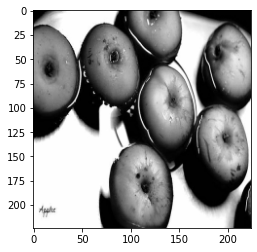

In [4]:
plt.imshow(gray[29] , cmap = plt.cm.gray)

In [5]:
gray.shape

(25000, 224, 224)

In [6]:
img_in.shape

(300, 224, 224, 3)

In [7]:
def get_rbg(gray_imgs , ab_imgs , n=10):
  img1 = np.zeros((n , 224 , 224 , 3))
  img1[:,:,:,0] = gray_imgs[0:n:]
  img1[:,:,:,1:] = ab_imgs[0:n]
  img1 = img1.astype(np.uint8)
  imgs = []
  for i in range(0,n):
    imgs.append(cv2.cvtColor(img1[i] , cv2.COLOR_LAB2RGB))
  imgs = np.array(imgs)
  return imgs

  

In [8]:
img_out = get_rbg(gray_imgs = gray , ab_imgs = ab , n=300)

In [9]:
model = Sequential()
model.add(Conv2D(strides = 1 , kernel_size = 3, filters = 12, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1 , kernel_size = 3, filters = 12, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model = Sequential()
model.add(Conv2D(strides = 1 , kernel_size = 3, filters = 12, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1 , kernel_size = 3, filters = 3, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model = Sequential()
model.add(Conv2D(strides = 1 , kernel_size = 3, filters = 12, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1 , kernel_size = 3, filters = 3, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model = Sequential()
model.add(Conv2D(strides = 1 , kernel_size = 3, filters = 12, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1 , kernel_size = 3, filters = 3, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(AveragePooling2D(pool_size = (2,2)))
model.add(UpSampling2D((2,2)))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

model = Sequential()
model.add(Conv2D(strides = 1 , kernel_size = 3, filters = 12, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(Conv2DTranspose(strides = 1 , kernel_size = 3, filters = 3, use_bias = True , bias_initializer = tf.keras.initializers.RandomUniform(minval = -0.05 , maxval = 0.05), padding = "valid" , activation = tf.nn.relu))
model.add(LeakyReLU(0.6))
model.add(Dropout(0.4))

In [10]:
model.compile(optimizer = tf.keras.optimizers.Adam() , loss='mape' , metrics = tf.keras.metrics.Accuracy())

In [13]:
model.fit(img_in , img_out , epochs=4000, batch_size=16)

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
19/19 [==============================] - 1s 28ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1502/4000
19/19 [==============================] - 1s 27ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1503/4000
19/19 [==============================] - 1s 28ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1504/4000
19/19 [==============================] - 1s 27ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1505/4000
19/19 [==============================] - 1s 29ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1506/4000
19/19 [==============================] - 1s 27ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1507/4000
19/19 [==============================] - 1s 27ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1508/4000
19/19 [==============================] - 1s 28ms/step - loss: 93.1914 - accuracy: 0.0681
Epoch 1509/4000
19/19 [==============================] - 1s 28ms/step - loss: 93.1914 - accuracy: 0.0681
Epoc

In [14]:
prediction=model.predict(img_in)

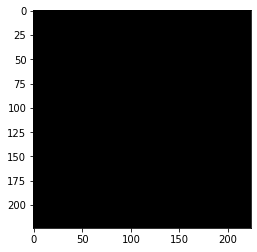

In [17]:
plt.imshow(prediction[29])

In [18]:
model.save('model.h5')